# Rafael Salinas' Notebook - Week 3

## Content:
- [part 2: data](#part-2:-data)
- [part 3: plotting](#part-3:-plotting)

In [1]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## part 2: data

In [2]:
gnacs_y = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
columnnames = gnacs_y.split('|')

In [3]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
dataframe1 = pd.read_csv('../data/twitter_sample.csv', sep='|', names=columnnames)

dataframe1 .head(7)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None
5,"tag:search.twitter.com,2005:351835317801730048",2013-07-01T22:50:51.000Z,I'm at Büyükçekmece Sahil w/ @emineetrk http:/...,['http://test.gnip.com/mock'],['http://t.co/30BZ8dBzxL'],['http://4sq.com/1cJD0J4'],['tr'],en,tr,"[41.01520298, 28.59359264]",Point,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,-18000,FENERBAHÇE TARAFTARINDIR!,None,None,None,None,None,None,None,None,Özgür Ayı,curva1907,361352064,41,226,346,0,7759,Tweet,None,None,None
6,"tag:search.twitter.com,2005:351835317554257920",2013-07-01T22:50:51.000Z,Dile Al Amor &gt;&gt;&gt;,None,None,None,['en'],en,pt,"[47.4355124, -120.3279417]",Point,"['[-120.364921, 47.396859]', '[-120.364921, 47...",Polygon,"Wenatchee, WA",US,-28800,"Wenatchee, Washington",None,None,None,None,None,None,None,None,Mailari ♥,MailariMunoz,30740676,42,247,64,1,2438,Tweet,None,None,None


Since there are so many explain fields that come back with 'None', let's just get rid of them for now. 

(In the future, we might try to find a way to make that field more descriptive, too.)

In [4]:
# n.b.: this is an *in-place* delete -- unusual for a pandas structure
del dataframe1['None']


In [5]:
dataframe1.head(7)

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None
5,"tag:search.twitter.com,2005:351835317801730048",2013-07-01T22:50:51.000Z,I'm at Büyükçekmece Sahil w/ @emineetrk http:/...,['http://t.co/30BZ8dBzxL'],['http://4sq.com/1cJD0J4'],['tr'],en,tr,"[41.01520298, 28.59359264]",Point,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,-18000,FENERBAHÇE TARAFTARINDIR!,None,None,None,None,None,None,None,None,Özgür Ayı,curva1907,361352064,41,226,346,0,7759,Tweet,None,None,None
6,"tag:search.twitter.com,2005:351835317554257920",2013-07-01T22:50:51.000Z,Dile Al Amor &gt;&gt;&gt;,None,None,['en'],en,pt,"[47.4355124, -120.3279417]",Point,"['[-120.364921, 47.396859]', '[-120.364921, 47...",Polygon,"Wenatchee, WA",US,-28800,"Wenatchee, Washington",None,None,None,None,None,None,None,None,Mailari ♥,MailariMunoz,30740676,42,247,64,1,2438,Tweet,None,None,None


## slicing & combining


Subsetting a DataFrame is very similar to the syntax in R. There are two ways to select columns: 'dot' (attribute) notation, and 'square bracket' (index) notation. Sometimes, the column names will dictate which you have to use.

In [6]:
# inspect those rows with twitter-classified lang 'es' (scroll the right to see)
dataframe1[dataframe1.twitter_lang == 'es'].tail()


,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
58,"tag:search.twitter.com,2005:351835319219400706",2013-07-01T22:50:51.000Z,#HolaJulio nada solo trae BUENAS fests... Chau,None,None,['es'],es,es,"[-34.5474842, -58.7062953]",Point,None,None,None,None,-10800,None,None,None,None,None,None,None,None,None,Ťąsmąňią,LauuCacciato,182900398,36,76,140,0,723,Tweet,None,None,None
61,"tag:search.twitter.com,2005:351835318850289665",2013-07-01T22:50:51.000Z,Buena noche,None,None,['es'],it,es,"[37.1793352, -5.7949027]",Point,"['[-6.0497685, 36.9160919]', '[-6.0497685, 37....",Polygon,"Utrera, Sevilla",ES,None,None,None,None,None,None,None,None,None,None,manolo,malooje94,936658410,36,159,160,0,2350,Tweet,None,None,None
63,"tag:search.twitter.com,2005:351835320121176064",2013-07-01T22:50:51.000Z,@VLADDO: Al ganador del concurso aquel debería...,None,None,['es'],en,es,"[9.3635352, -73.6014936]",Point,None,None,None,None,-18000,"VALLEDUPAR, COLOMBIA...",None,None,None,None,None,None,None,None,Enrique...,kikekamacho,190517290,31,182,706,1,2417,Tweet,None,None,None
71,"tag:search.twitter.com,2005:351835320339283968",2013-07-01T22:50:51.000Z,Nooooooooooooooooooooooooooooooooooooooooooooo...,None,None,['en'],en,es,None,None,"['[-46.826038999999994, -24.008813999999997]',...",Polygon,"São Paulo, São Paulo",BR,-10800,London - Mullingar,None,None,None,None,None,None,None,None,Pequena do Will :3,NathaliaCruzs,586933574,40,472,535,0,18460,Tweet,None,None,None
85,"tag:search.twitter.com,2005:351835320817426433",2013-07-01T22:50:51.000Z,Como cuando grito ¡¡*José*!! y la mayoria de m...,None,None,['es'],en,es,"[14.9673297, -91.7889038]",Point,"['[-94.230569, 14.5319181]', '[-94.230569, 17....",Polygon,"Chiapas, México",MX,-10800,Guatemala,None,None,None,None,None,None,None,None,Pilar Ochoa,PiLigrOsa,107307381,39,280,258,0,2632,Tweet,None,None,None


Let's get a subset of this dataframe that has numerical values so we can eventually do some stuff.

In [7]:
# create new dataframe from numerical columns
dataframe2 = dataframe1[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount", "actor:statusesCount"]]

dataframe2.tail(6)

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount
89,44,64,58,0,1872
90,53,5084,3802,11,30163
91,44,1248,1962,0,11161
92,40,128,76,0,1419
93,30,48,88,0,957
94,41,198,188,0,1897


In [8]:
# let's check data types of the columns...
dataframe2.dtypes  

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
actor:statusesCount      int64
dtype: object

The `object` type means that the column has multiple types of data in it. This is a good opportunity to 'fix' a section of the DataFrame by way of a function & the `map()` function

In [9]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def toFloat(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

In [10]:
# assigning to an existing column overwrites that column 
dataframe2['gnip:klout_score'] = dataframe2['gnip:klout_score'].map(toFloat)

# check again
dataframe2.dtypes

/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


gnip:klout_score        float64
actor:followersCount      int64
actor:friendsCount        int64
actor:listedCount         int64
actor:statusesCount       int64
dtype: object

In [11]:
# use all floats just for fun. 
#  this only works if the elements can all be converted to floats (e.g. ints or something python can handle) 
dataframe2 = dataframe2.astype(float)

dataframe2.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
actor:statusesCount     float64
dtype: object

Since they're all numbers now, we can do math and also add new columns to the DataFrame. Combining values from separate columns occurs on a row-by-row basis, as expected.

In [12]:
# look at some activity ratios - add col to df
dataframe2['friendsCount/followersCount'] = dataframe2['actor:friendsCount'] / dataframe2['actor:followersCount']

dataframe2.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
#df2.describe()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,friendsCount/followersCount
0,35.0,178.0,129.0,0.0,2028.0,0.724719
1,32.0,144.0,215.0,0.0,4071.0,1.493056
2,18.0,37.0,54.0,0.0,3505.0,1.459459
3,50.0,438.0,174.0,1.0,17636.0,0.397260
4,21.0,12.0,6.0,0.0,145.0,0.500000


## grouping

groupby() is used for the split-apply-combine process. I'm led to believe that this is one of the stronger aspects of `pandas`' approach to DataFrames (versus R's), but haven't yet had a chance to really see the power.

In [13]:
# back to bigger df, without 'None' cols
dataframe1.head()

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


Use a groupby to collect all rows by language value, and subsequently use some of the methods available to `GroupBy` DataFrames. Note that the `GroupBy` methods will only act on (and the method call only return) values for columns where numerical calculation makes sense.

In [14]:
# subset df, create new df with only 'popular' accounts -- those matching the filter condition given
popular_dataframe = dataframe1[dataframe1["actor:followersCount"] >= 500]

# fix the klout scores again
popular_dataframe['gnip:klout_score'] = popular_dataframe['gnip:klout_score'].map(toFloat)

# in case you need to remind yourself of the dataframe
popular_dataframe.head()


/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
10,"tag:search.twitter.com,2005:351835318044983298",2013-07-01T22:50:51.000Z,@DiegoSanRoman no y no me gusta.,None,None,['en'],en,es,"[19.34964, -99.19341]",Point,"['[-99.32437499999999, 19.232228]', '[-99.3243...",Polygon,"Álvaro Obregón, Distrito Federal",MX,-28800,None,None,None,None,None,None,None,None,None,Carlos Hermosillo,CHermosillo_FOX,1160945754,62.0,11873,69,56,1991,Reply,http://twitter.com/DiegoSanRoman/statuses/3515...,None,None
12,"tag:search.twitter.com,2005:351835318497980416",2013-07-01T22:50:51.000Z,Rubbing/massaging my feet is like giving me he...,None,None,['en'],en,en,"[33.68890281, -84.27369741]",Point,"['[-85.605165, 30.355756999999997]', '[-85.605...",Polygon,"Georgia, US",US,-18000,Atl...,None,None,None,None,None,None,None,None,Poison †,shanbonita,29619102,64.0,40543,116,486,60465,Tweet,None,None,None
16,"tag:search.twitter.com,2005:351835318896439296",2013-07-01T22:50:51.000Z,Jgc,None,None,['fr'],en,und,"[45.7111863, 4.8557398]",Point,"['[4.836346, 45.6805901]', '[4.836346, 45.7188...",Polygon,"Saint-Fons, Rhône",FR,3600,Lyon,None,None,None,None,None,None,None,None,Lisa jtm(Alex Karev),thatsniall__,564585123,53.0,1179,628,8,20141,Tweet,None,None,None
19,"tag:search.twitter.com,2005:351835319085187072",2013-07-01T22:50:51.000Z,@Michael5SOS MIKEY I LOVE U,None,None,['it'],en,en,"[43.82758701, 12.99396517]",Point,"['[12.9010202, 43.7535429]', '[12.9010202, 43....",Polygon,"Fano, Pesaro e Urbino",IT,3600,♡,None,None,None,None,None,None,None,None,meconio.,liamsfaith,382824235,44.0,5589,2200,17,51769,Tweet,None,None,None
20,"tag:search.twitter.com,2005:351835319315857408",2013-07-01T22:50:51.000Z,"BONITO UNFOLLOW,ZORRA.",None,None,['es'],en,it,None,None,"['[-18.1606948, 27.6377504]', '[-18.1606948, 2...",Polygon,"Santa Cruz de Tenerife, Islas Canarias",ES,3600,None,None,None,None,None,None,None,None,None,Robyn Rihanna Fenty,ConSdeSammy,554205628,46.0,1999,293,27,60236,Tweet,None,None,None


In [15]:
# use GroupBy methods for stats on each group:
print popular_dataframe.groupby("twitter_lang").size() # number of elements per group
print "\n *** SUM:"
print popular_dataframe.groupby("twitter_lang").sum()       # sum of elements in each group (obviously doesn't make sense for some cols) 
print "\n *** MEAN:"
print popular_dataframe.groupby("twitter_lang").mean()      # algebraic mean of elements per group

twitter_lang
en     12
es      3
id      1
it      2
pl      1
pt      3
und     1
vi      1
dtype: int64

 *** SUM:
                actor:id  gnip:klout_score  actor:followersCount  \
twitter_lang                                                       
en            3212439572             501.0                 55867   
es            1737389226             136.0                 16279   
id             527060033              48.0                   727   
it            1116298302              99.0                  7083   
pl            1041817357              48.0                  2037   
pt             914341196             125.0                  2796   
und            564585123              53.0                  1179   
vi             269323425              44.0                   767   

              actor:friendsCount  actor:listedCount  actor:statusesCount  
twitter_lang                                                              
en                         11800                551 

In [16]:
# though this looks like a normal dataframe, the DataFrameGroupBy object has a heirarchical index
#  this means it may not act as you might expect.
language_gb = popular_dataframe[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')


# note the new index 'twitter_lang' -- in this case, .head(n) returns <= n elements for each index
language_gb.head(4)  



,twitter_lang,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
10,es,62.0,11873,69,1991
12,en,64.0,40543,116,60465
16,und,53.0,1179,628,20141
19,en,44.0,5589,2200,51769
20,it,46.0,1999,293,60236
24,pl,48.0,2037,1984,23240
36,en,39.0,1752,2000,21618
39,es,40.0,3285,2106,31002
41,es,34.0,1121,1013,7590
44,pt,44.0,789,150,10134


In [17]:
# see that they type is DataFrameGroupBy object
language_gb

In [18]:
# to get a DataFrame object that responds more like I'm used to, create a new one using the 
#   aggregate method, which results in a single-index DataFrame
language_gb_mean = language_gb.aggregate(np.mean)  

language_gb_mean.head(4)

# verify the single index
#lang_gb_mean.index

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,,
en,41.750000,4655.583333,983.333333,36291.166667
es,45.333333,5426.333333,1062.666667,13527.666667
id,48.000000,727.000000,157.000000,13176.000000
it,49.500000,3541.500000,2047.500000,45199.500000


## part 3: plotting

Below is some easy, base matplotlib, but 'nice' graphics take *a lot* of code. This situation is changing quite quickly now, with the success of `ggplot2` in the R world and the attempts to a) make `matplotlib` look less sucky, and b) implement the Grammar of Graphics in Python.

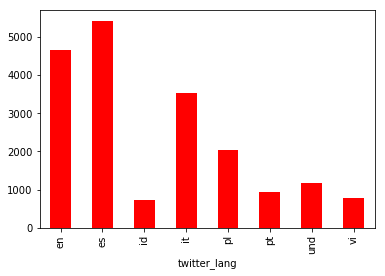

In [19]:
# .plot() is a pandas wrapper for matplotlib's plt.plot() 
language_gb_mean['actor:followersCount'].plot(kind='bar', color='r')

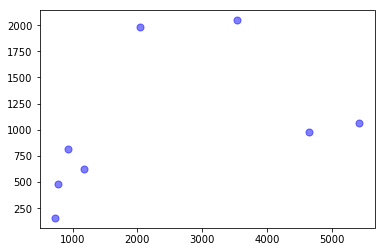

In [20]:
# more base matplotlib 
plt.scatter(x=language_gb_mean['actor:followersCount'],\
            y=language_gb_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=50,\
            color='blue',\
            marker='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2401a03f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2401275f10>]], dtype=object)

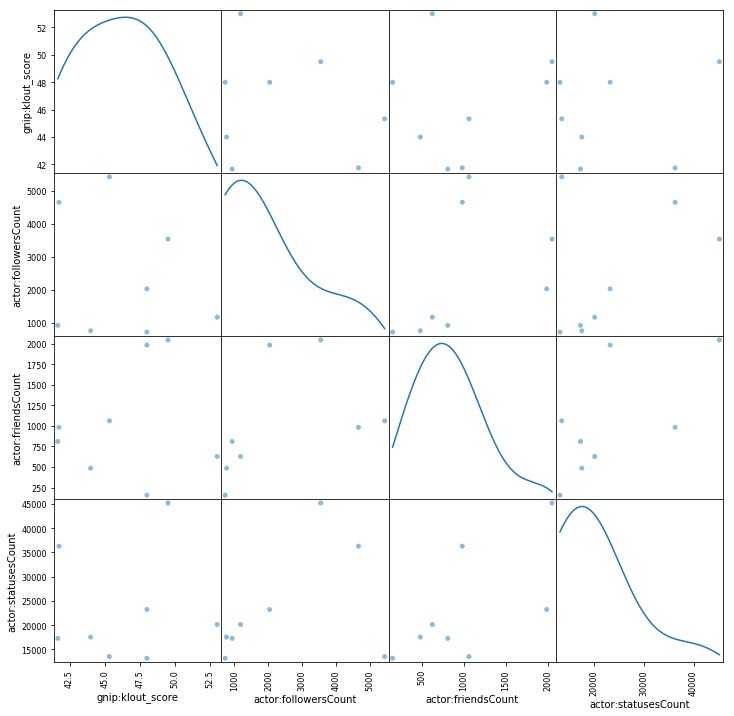

In [21]:
# now read the docs and copypasta a neat-looking plot
from pandas.plotting import scatter_matrix

scatter_matrix(language_gb_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)

Finally, a short taste of some other plotting libraries. My munging + plotting skillz in this world are still a work in progress, so I will definitely return to this section with an actual use-case in the future. For now, we'll make up some data for illustrative purposes.

In [22]:
# make up some data with large-scale patterns and a datetime index
dataframe = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
dataframe = dataframe.cumsum()
dataframe.head()

,A,B,C,D
2000-01-01,-0.271433,1.683582,-0.211284,-0.435027
2000-01-02,-0.334721,3.207309,1.245165,0.896598
2000-01-03,-0.758192,3.997627,0.831537,-0.249405
2000-01-04,-0.496679,3.546580,0.001253,0.877341
2000-01-05,0.001682,2.693954,0.258875,1.690137


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23f853dc10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f23f83e4dd0>]], dtype=object)

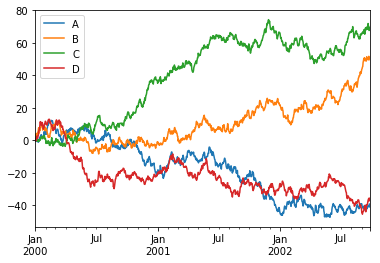

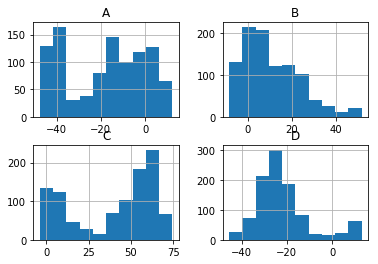

In [23]:
dataframe.plot()
dataframe.hist()

Now, let's use some other matplotlib wrappers to get a sense of how we can make this look a little better....

- `prettyplotlib` essentially just fixes a bunch of matplotlib settings behind the scenes so your base methods lead to e.g. ColorBrewer palettes. This essentially overwrites the .matplotlibrc settings for this session with palettes and settings that are slightly nicer. The settings will remain until you start a new session.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2401645710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f23f8053250>]], dtype=object)

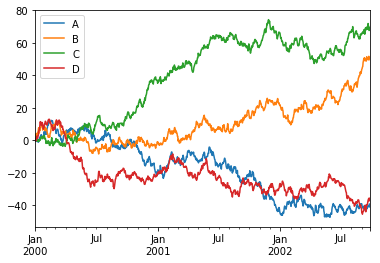

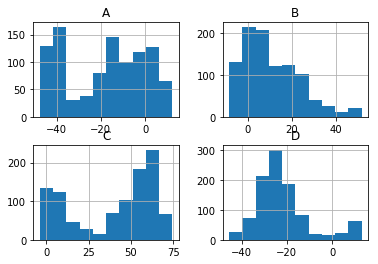

In [24]:
import prettyplotlib

dataframe.plot()
dataframe.hist()

# Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you'll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the :ref:`categorical plots <categorical_tutorial>` chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [25]:
%matplotlib inline

In [26]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns
sns.set(color_codes=True)

In [28]:
np.random.seed(sum(map(ord, "distributions")))

Plotting univariate distributions
---------------------------------

The most convenient way to take a quick look at a univariate distribution in seaborn is the ***`distplot` function. By default, this will draw a `histogram <https://en.wikipedia.org/wiki/Histogram>`_ and fit a `kernel density estimate <https://en.wikipedia.org/wiki/Kernel_density_estimation>`_ (KDE). 

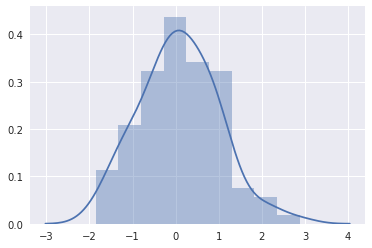

In [29]:
x = np.random.normal(size=100)
sns.distplot(x);

**Histograms**

Histograms are likely familiar, and a **``hist``** function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let's remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the **`rugplot`** function, but it is also available in **`distplot`**:

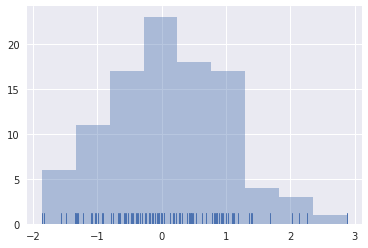

In [30]:
sns.distplot(x, kde=False, rug=True);

**Kernel density estimaton**

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

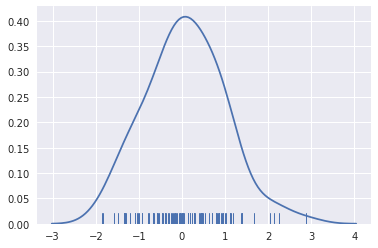

In [31]:
sns.distplot(x, hist=False, rug=True);

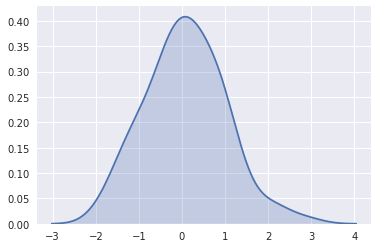

In [32]:
sns.kdeplot(x, shade=True);

Plotting bivariate distributions
--------------------------------

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the ***`jointplot` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [33]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

**Scatterplots**


The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the *x* and *y* values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib **``plt.scatter``** function, and it is also the default kind of plot shown by the **`jointplot`** function:

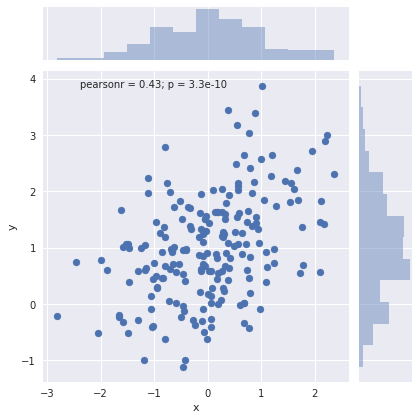

In [34]:
sns.jointplot(x="x", y="y", data=df);

**Hexbin plots**

The bivariate analogue of a histogram is known as a **"hexbin"** plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's available through the matplotlib **``plt.hexbin``** function and as a style in **`jointplot`**. It looks best with a white background:

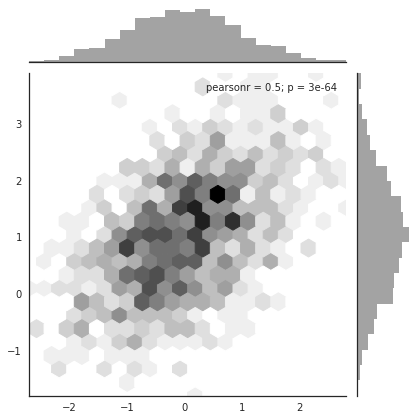

In [35]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

**Kernel density estimation**


It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in **`jointplot`**:

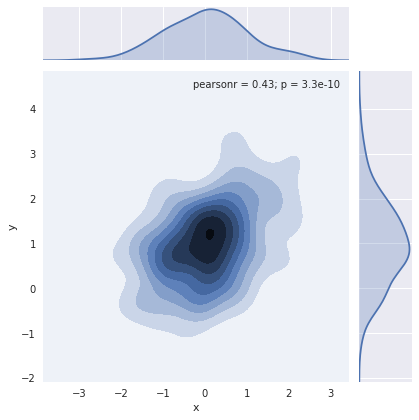

In [36]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

Visualizing pairwise relationships in a dataset
-----------------------------------------------

To plot multiple pairwise bivariate distributions in a dataset, you can use the **`pairplot`** function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

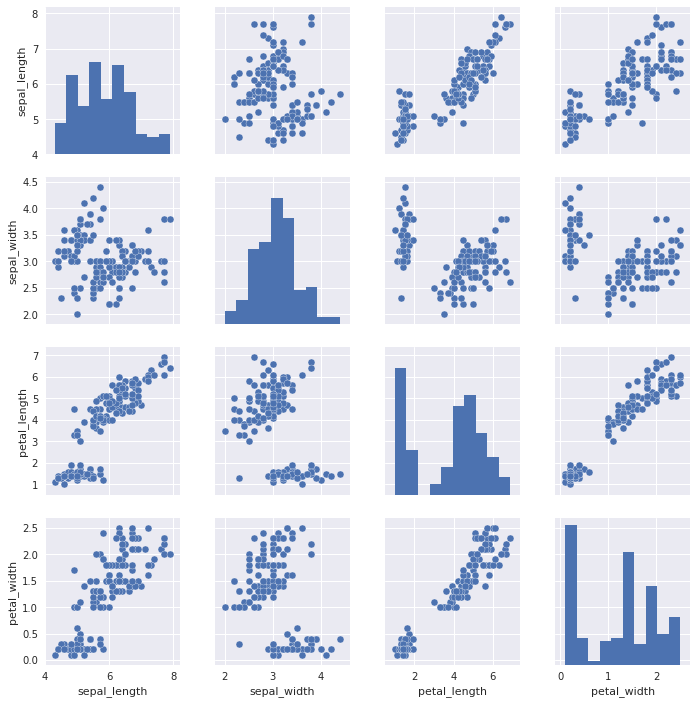

In [37]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Much like the relationship between **`jointplot`** and **`JointGrid`**, the **`pairplot`** function is built on top of a **`PairGrid`** object, which can be used directly for more flexibility:

/bda/app/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


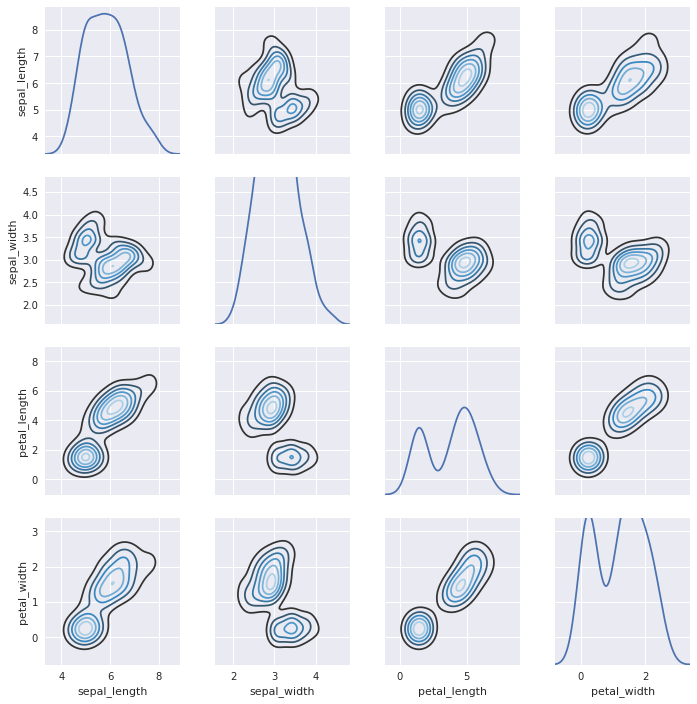

In [38]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

# Visualizing linear relationships

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [40]:
np.random.seed(sum(map(ord, "regression")))

In [41]:
tips = sns.load_dataset("tips")

Functions to draw linear regression models
------------------------------------------

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, **`regplot`** and **`lmplot`** are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, ``x`` and ``y``, and then fit the regression model ``y ~ x`` and plot the resulting regression line and a 95% confidence interval for that regression:

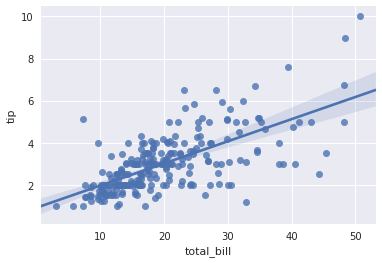

In [42]:
sns.regplot(x="total_bill", y="tip", data=tips);

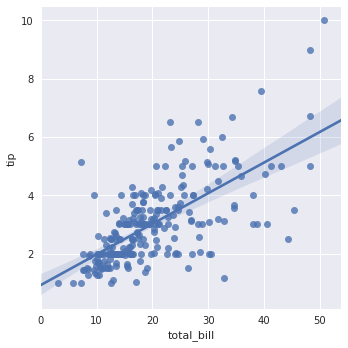

In [43]:
sns.lmplot(x="total_bill", y="tip", data=tips);

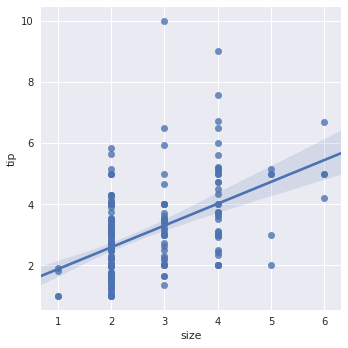

In [44]:
sns.lmplot(x="size", y="tip", data=tips);

Fitting different kinds of models
---------------------------------

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The `Anscombe's quartet <https://en.wikipedia.org/wiki/Anscombe%27s_quartet>`_ dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

In [45]:
anscombe = sns.load_dataset("anscombe")

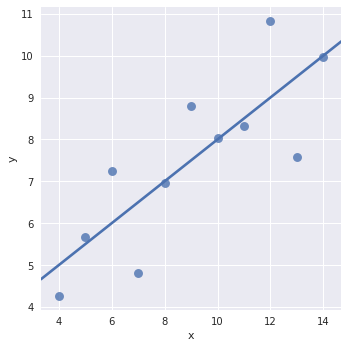

In [46]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

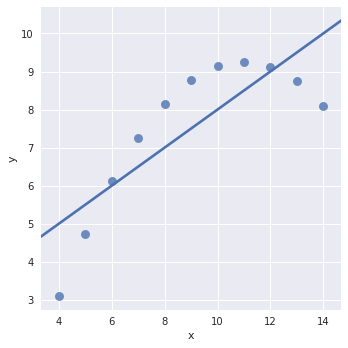

In [47]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

In the presence of these kind of higher-order relationships, **`lmplot`** and **`regplot`** can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

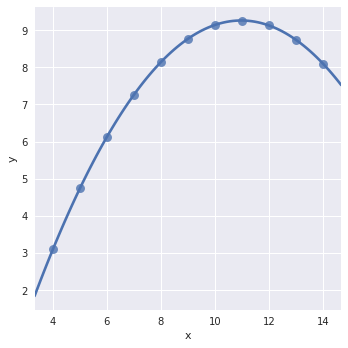

In [48]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

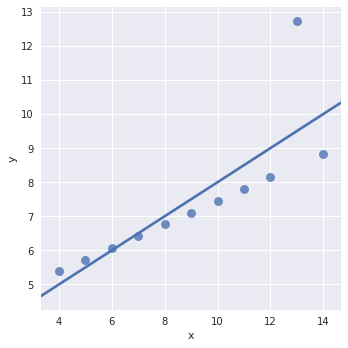

In [49]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

When the ``y`` variable is binary, simple linear regression also "works" but provides implausible predictions:

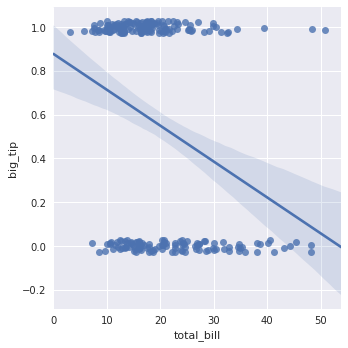

In [50]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of ``y = 1`` for a given value of ``x``:

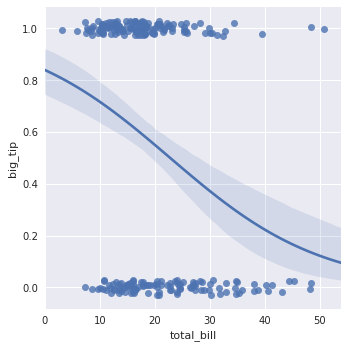

In [51]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

Conditioning on other variables
-------------------------------

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is "how does the relationship between these two variables change as a function of a third variable?" This is where the difference  between **`regplot`** and **`lmplot`** appears. While **`regplot`** always shows a single relationship, **`lmplot`** combines **`regplot`** with **`FacetGrid`** to provide an easy interface to show a linear regression on "faceted" plots that allow you to explore interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

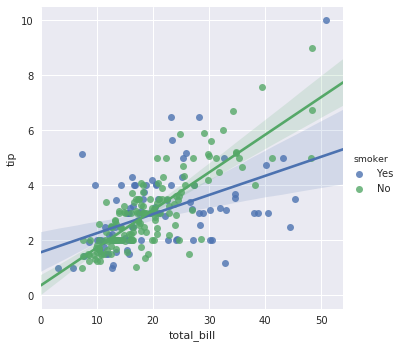

In [52]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In addition to color, it's possible to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used:

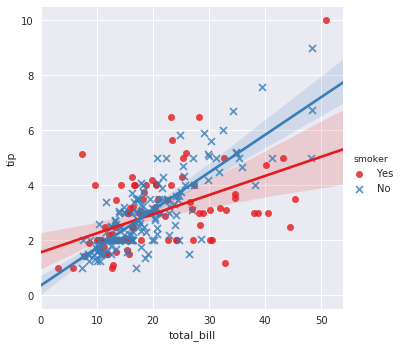

In [53]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

To add another variable, you can draw multiple "facets" which each level of the variable appearing in the rows or columns of the grid:

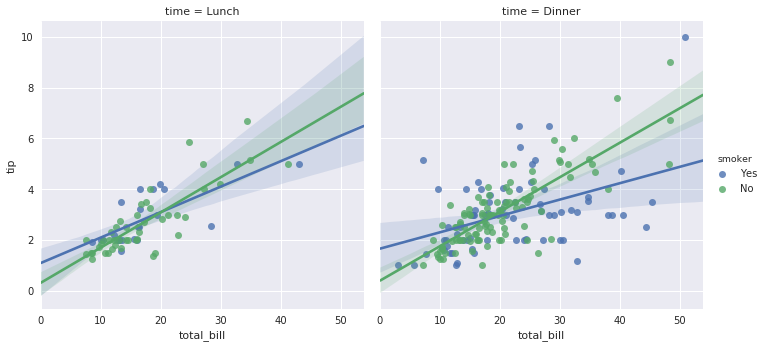

In [54]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

Controlling the size and shape of the plot
------------------------------------------

Before we noted that the default plots made by **`regplot`** and **`lmplot`** look the same but on axes that have a different size and shape. This is because **`regplot`** is an "axes-level" function draws onto a specific axes. This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. If no axes object is explictly provided, it simply uses the "currently active" axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself.

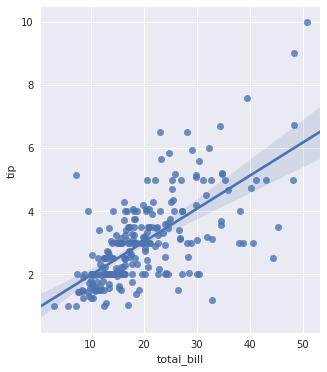

In [55]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

In contrast, the size and shape of the **`lmplot`** figure is controlled through the `FacetGrid` interface using the ``size`` and ``aspect`` parameters, which apply to each *facet* in the plot, not to the overall figure itself:

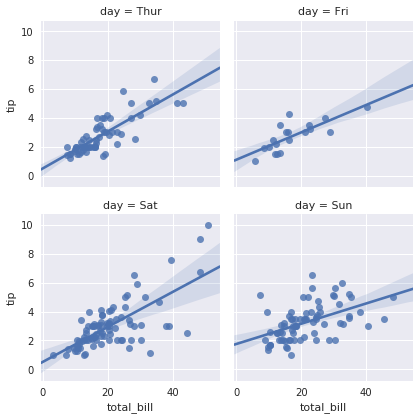

In [56]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

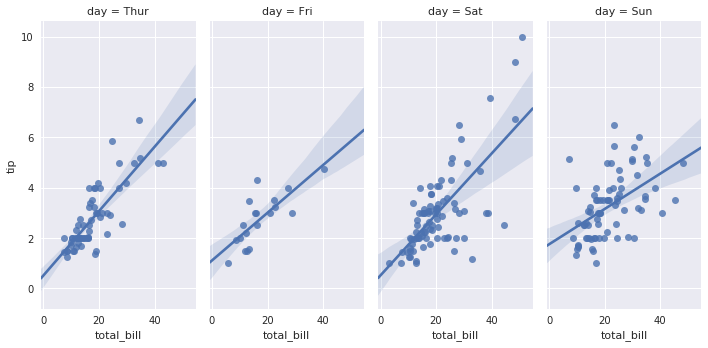

In [57]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

Plotting a regression in other contexts
---------------------------------------

A few other seaborn functions use **`regplot`** in the context of a larger, more complex plot. The first is the **`jointplot`** function that we introduced in the :ref:`distributions tutorial <distribution_tutorial>`. In addition to the plot styles previously discussed, **`jointplot`** can use **`regplot`** to show the linear regression fit on the joint axes by passing ``kind="reg"``:

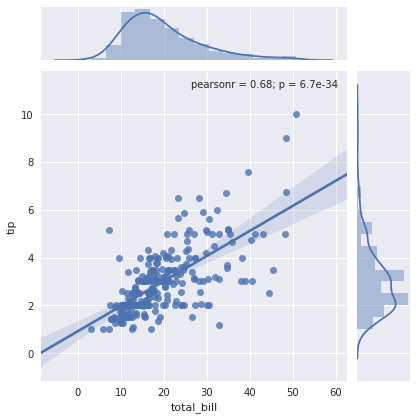

In [58]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

Using the **`pairplot`** function with ``kind="reg"`` combines **`regplot`** and **`PairGrid`** to show the linear relationship between variables in a dataset. Take care to note how this is different from **`lmplot`**. In the figure below, the two axes don't show the same relationship conditioned on two levels of a third variable; rather, **`PairGrid`** is used to show multiple relationships between different pairings of the variables in a dataset:

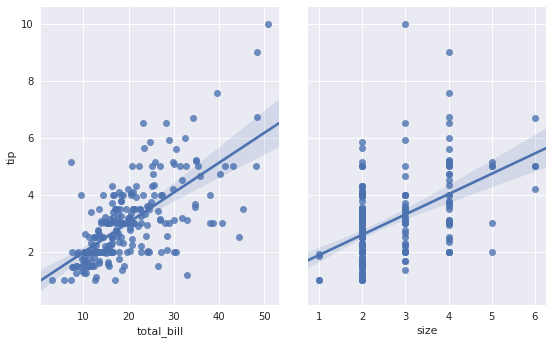

In [59]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

Like **`lmplot`**, but unlike **`jointplot`**, conditioning on an additional categorical variable is built into **`pairplot`** using the ``hue`` parameter:

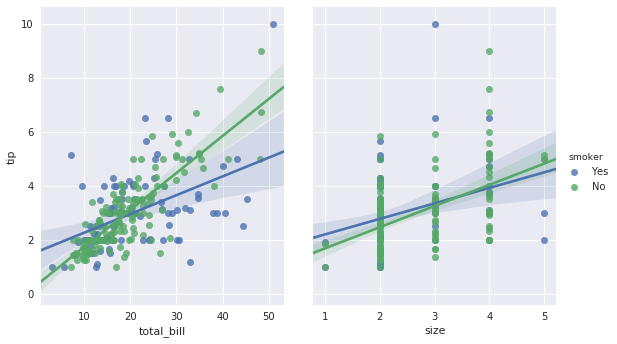

In [60]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

# Plotting with categorical data

We can use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won't work. There are several options, however, for visualizing such a relationship.

It's useful to divide seaborn's categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each *distribution* of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The first includes the functions **swarmplot** and **stripplot**, the second includes **boxplot** and **violinplot**, and the third includes **barplot** and **pointplot**. These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between **regplot** and **lmplot**, in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level **factorplot**, which combines these functions with a **FacetGrid** to apply a categorical plot across a grid of figure panels.

In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [62]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

In [63]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

Categorical scatterplots
------------------------

A simple way to show the values of some quantitative variable across the levels of a categorical variable uses ***`stripplot`, which generalizes a scatterplot to the case where one of the variables is categorical:

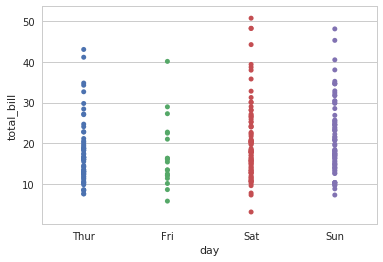

In [64]:
sns.stripplot(x="day", y="total_bill", data=tips);

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random "jitter": 

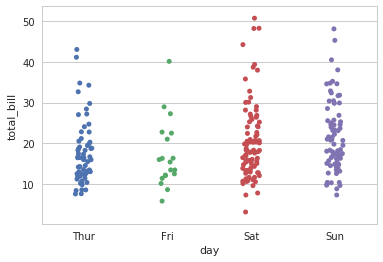

In [65]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

A different approach would be to use the function ***`swarmplot`, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

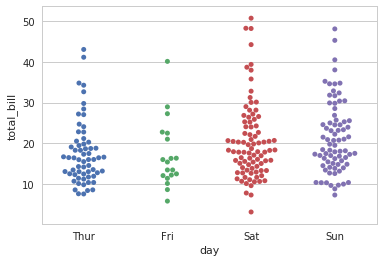

In [66]:
sns.swarmplot(x="day", y="total_bill", data=tips);

It's also possible to add a nested categorical variable with the ``hue`` parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

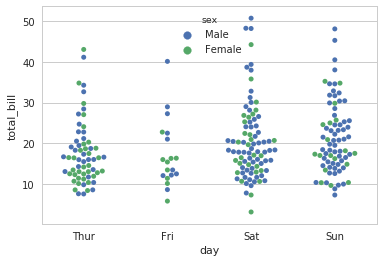

In [67]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

Distributions of observations within categories
-----------------------------------------------

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels. These generalize some of the approaches we discussed in the :ref:`chapter <distribution_tutorial>` to the case where we want to quickly compare across several distributions.

Boxplots
^^^^^^^^

The first is the familiar ***`boxplot`. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

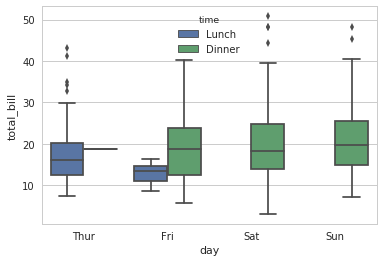

In [68]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

Violinplots
^^^^^^^^^^^

A different approach is a ***`violinplot`, which combines a boxplot with the kernel density estimation procedure described in the :ref:`distributions <distribution_tutorial>` tutorial:

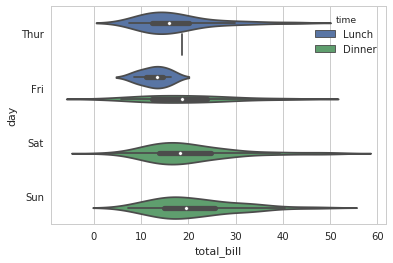

In [69]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

It's also possible to "split" the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

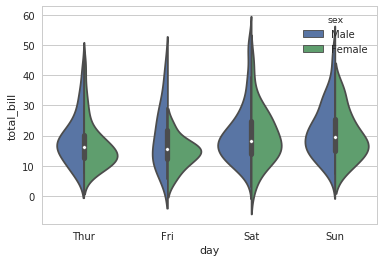

In [70]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

Statistical estimation within categories
----------------------------------------

Often, rather than showing the distribution within each category, you might want to show the central tendency of the values. Seaborn has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.

Bar plots
----------

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the ***`barplot`*** function operates on a full dataset and shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

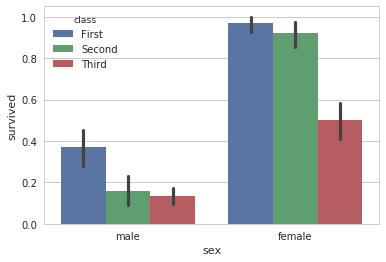

In [71]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it's easy to do so with the ***`countplot` function:

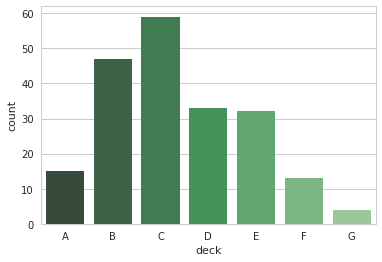

In [72]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

Both ***`barplot`*** and ***`countplot`*** can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function:

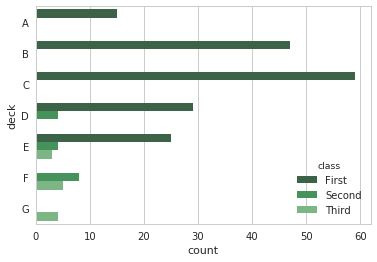

In [73]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

Point plots
------------

An alternative style for visualizing the same information is offered by the ***`pointplot`*** function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same ``hue`` category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:

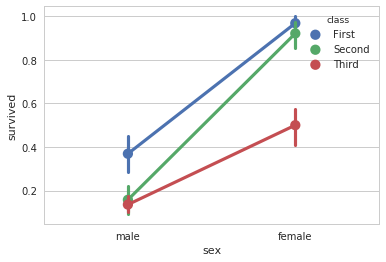

In [74]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

To make figures that reproduce well in black and white, it can be good to use different markers and line styles for the levels of the ``hue`` category:

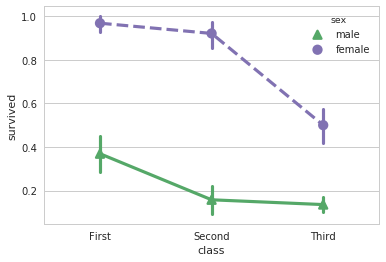

In [75]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

Plotting "wide-form" data
-------------------------

While using "long-form" or "tidy" data is preferred, these functions can also by applied to "wide-form" data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the ``data`` parameter:

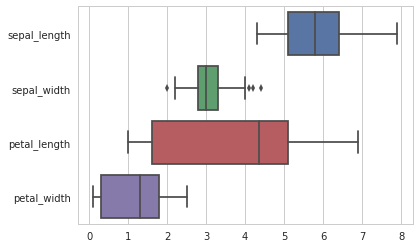

In [76]:
sns.boxplot(data=iris, orient="h");

Additionally, these functions accept vectors of Pandas or numpy objects rather than variables in a ``DataFrame``:

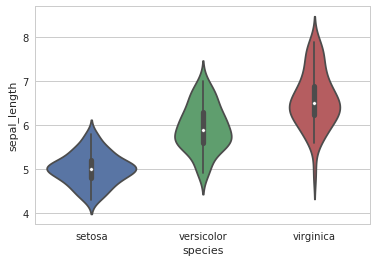

In [77]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands. Of course, this also means that the plots can happily coexist in a multi-panel figure with other kinds of plots:

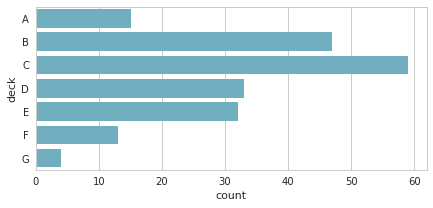

In [78]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

Drawing multi-panel categorical plots
-------------------------------------

As we mentioned above, there are two ways to draw categorical plots in seaborn. Similar to the duality in the regression plots, you can either use the functions introduced above, or the higher-level function ***`factorplot`***, which combines these functions with a ***`FacetGrid`*** to add the ability to examine additional categories through the larger structure of the figure. By default, ***`factorplot`*** produces a ***`pointplot`***:

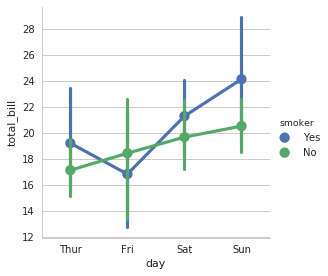

In [79]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

However, the ``kind`` parameter lets you chose any of the kinds of plots discussed above:

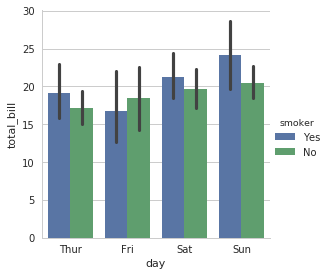

In [80]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

The main advantage of using a ***`factorplot`*** is that it is very easy to "facet" the plot and investigate the role of other categorical variables:

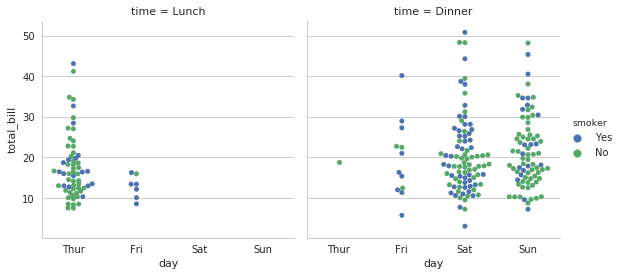

In [81]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");